In [74]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import random
import pandas as pd
import os

from sklearn.model_selection import train_test_split

import skimage
from skimage import io

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from PIL import Image, ImageFilter


import time
import numpy
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
import keras

import keras.utils as np_utils

In [4]:
#This is the Data to be Trained and Labeled.
X = []
y = []

X_images = []
y_images = []

#Data Paths
train_image_path = r"C:\Users\buckf\Documents\Practicum_2\Data\train\images"
train_mask_path = r"C:\Users\buckf\Documents\Practicum_2\Data\train\masks"


image_list = os.listdir(train_image_path)
mask_list = os.listdir(train_mask_path)

for image_num in range(len(image_list)):
    #Gets the Path to the Mask
    certain_image_path = os.path.join(train_image_path, image_list[image_num])
    image_img = Image.open(certain_image_path).convert('L')
    image_pix = np.array(image_img.getdata()).reshape(image_img.size[0], image_img.size[1], 1)
    X.append(image_pix)
    X_images.append(image_img)

for mask_num in range(len(mask_list)):
    #Gets the Path to the Mask
    certain_mask_path = os.path.join(train_mask_path, mask_list[mask_num])
    mask_img = Image.open(certain_mask_path).convert('L')
    mask_pix = np.array(mask_img.getdata()).reshape(mask_img.size[0], mask_img.size[1], 1)
    y.append(mask_pix)
    y_images.append(mask_img)
    
X = np.array(X, dtype = 'float32')
y = np.array(y, dtype = 'float32')

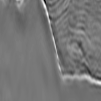

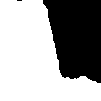

In [5]:
#This is how data looks. 
#The top is the what we need to seperate salt from sediment.
#The bottom is the mask or label we need to predict. 
display(X_images[10], y_images[10])

In [22]:
X.shape

(4000, 101, 101, 1)

In [23]:
X[10].shape

(101, 101, 1)

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.5, shuffle = True)

c:\users\buckf\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [48]:
X_train.shape

(2000, 101, 101, 1)

In [49]:
K.clear_session

<function keras.backend.tensorflow_backend.clear_session()>

In [55]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer
# hint: you need Flatten() before the first dense layer
    
    
    model = Sequential()
    model.add(Conv2D(1, kernel_size = (1,1), activation = 'relu', input_shape = (X_train.shape[1], X_train.shape[2], 1)))
    model.add(MaxPooling2D(pool_size=(1,1)))
    model.add(Dropout(0.25))
    
    model.compile(loss= keras.losses.mean_squared_error , optimizer= 'adam' , metrics=['accuracy'])
    return model
    
# build the model
model = simple_cnn_model()

# Fit the model

t0 = time.time()
log = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
t1 = time.time()
print(t1-t0, " seconds")
# Final evaluation of the model
scores = model.evaluate(X_val, y_val, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 2000 samples, validate on 2000 samples
Epoch 1/20
2000/2000 [==============================] - 3s 1ms/step - loss: 14779.0265 - acc: 0.2107 - val_loss: 12947.4070 - val_acc: 0.0127
Epoch 2/20
2000/2000 [==============================] - 2s 815us/step - loss: 13727.0093 - acc: 0.2107 - val_loss: 12800.0740 - val_acc: 0.0127
Epoch 3/20
2000/2000 [==============================] - 2s 836us/step - loss: 13247.9624 - acc: 0.2106 - val_loss: 12843.5197 - val_acc: 0.0127
Epoch 4/20
2000/2000 [==============================] - 2s 784us/step - loss: 13061.7404 - acc: 0.2107 - val_loss: 12931.9386 - val_acc: 0.0127
Epoch 5/20
2000/2000 [==============================] - 2s 786us/step - loss: 12994.1043 - acc: 0.2109 - val_loss: 13006.1712 - val_acc: 0.0127
Epoch 6/20
2000/2000 [==============================] - 2s 767us/step - loss: 12979.6892 - acc: 0.2106 - val_loss: 13052.1925 - val_acc: 0.0127
Epoch 7/20
2000/2000 [==============================] - 2s 836us/step - loss: 12972.4190 -

In [70]:
import tensorflow as tf

In [ ]:
tf.nn.conv2d_transpose()

In [94]:
K.clear_session()

In [98]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer

    
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3,3),
                     activation = 'relu',
                     padding = 'same',
                     input_shape = (X_train.shape[1], X_train.shape[2], 1)))

    model.add(Conv2D(32, kernel_size = (3,3),
                     padding = 'same',
                     activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    
    model.add(Conv2DTranspose(filters=1, kernel_size=(3,3), strides=(2,2)))
    
    
    
    model.compile(loss= keras.losses.mean_squared_error , optimizer= 'adam' , metrics=['accuracy'])
    return model
    
    
    
    
model = simple_cnn_model()
model.summary()
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
# # build the model
# model = simple_cnn_model()

# # Fit the model

# t0 = time.time()
# log = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
# t1 = time.time()
# print(t1-t0, " seconds")
# # Final evaluation of the model
# scores = model.evaluate(X_val, y_val, verbose=0)
# print("CNN Error: %.2f%%" % (100-scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 101, 101, 32)      320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 101, 101, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 101, 101, 1)       289       
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples, validate on 2000 samples
Epoch 1/20
2000/2000 [==============================] - 6s 3ms/step - loss: 12687.7165 - acc

In [ ]:
# class SaltDataset(Dataset):
#     def __init__(self, transform, mode, image_size, fold_index, aug_list):

#         self.transform = transform
#         self.mode = mode
#         self.image_size = image_size
#         self.aug_list = aug_list

#         print('AugList: ')
#         print(self.aug_list)

#         # change to your path
#         self.train_image_path = r"C:\Users\buckf\Documents\Practicum_2\Data\train\images"
#         self.train_mask_path = r"C:\Users\buckf\Documents\Practicum_2\Data\train\masks"
#         self.test_image_path = r"C:\Users\buckf\Documents\Practicum_2\Data\test"

#         self.fold_index = None
#         self.set_mode(mode, fold_index)


#     def set_mode(self, mode, fold_index):
#         self.mode = mode
#         self.fold_index = fold_index
#         print('fold index set: ' + str(fold_index))

#         if self.mode == 'train':
#             data = pd.read_csv('./data_process/10fold/fold' + str(fold_index) + '_train.csv')
#             self.train_list = data['fold']
#             self.train_list = [tmp + '.png' for tmp in self.train_list]
#             self.num_data = len(self.train_list)

#         elif self.mode == 'val':
#             data = pd.read_csv('./data_process/10fold/fold' + str(fold_index) + '_valid.csv')
#             self.val_list = data['fold']
#             self.val_list = [tmp + '.png' for tmp in self.val_list]
#             self.num_data = len(self.val_list)

#         elif self.mode == 'test':
#             self.test_list = read_txt('./data_process/10fold/test.txt')
#             self.num_data = len(self.test_list)
#             print('set dataset mode: test')

#     def __getitem__(self, index):
#         if self.fold_index is None:
#             print('WRONG!!!!!!! fold index is NONE!!!!!!!!!!!!!!!!!')
#             return

#         if self.mode == 'train':
#             image = cv2.imread(os.path.join(self.train_image_path, self.train_list[index]), 1)
#             label = cv2.imread(os.path.join(self.train_mask_path, self.train_list[index]), 0)

#         if self.mode == 'val':
#             image = cv2.imread(os.path.join(self.train_image_path, self.val_list[index]), 1)
#             label = cv2.imread(os.path.join(self.train_mask_path, self.val_list[index]), 0)

#         if self.mode == 'test':
#             image = cv2.imread(os.path.join(self.test_image_path, self.test_list[index]), 1)
#             image_id = self.test_list[index].replace('.png', '')

#             if self.image_size == 128:
#                 image = resize_and_pad(image, resize_size=101, factor=64)

#             image = image.reshape([self.image_size, self.image_size, 3])
#             image = np.transpose(image, (2, 0, 1))
#             image = image.astype(np.float32)
#             image = image.reshape([3, self.image_size, self.image_size])
#             image = (image.astype(np.float32) - 127.5) / 127.5
#             return image_id, torch.FloatTensor(image)

#         is_empty = False
#         if np.sum(label) == 0:
#             is_empty = True

#         if self.mode == 'train':
#             image, label = resize_and_random_pad(image, label, resize_size=101, factor=128, limit=(-13, 13))
#         else:
#             image = resize_and_pad(image, resize_size=101, factor=128)
#             label = resize_and_pad(label, resize_size=101, factor=128)

#         image = cv2.resize(image, (self.image_size, self.image_size))
#         label = cv2.resize(label, (self.image_size, self.image_size))

#         if self.mode == 'train':
#             if 'flip_lr' in self.aug_list:
#                 if random.randint(0, 1) == 0:
#                     image = cv2.flip(image, 1)
#                     label = cv2.flip(label, 1)

#         image = image.reshape([self.image_size, self.image_size, 3])
#         label = label.reshape([self.image_size, self.image_size, 1])
#         image = np.transpose(image, (2, 0, 1)).astype(np.float32)
#         image = (image.astype(np.float32) - 127.5) / 127.5

#         label = label.reshape([1, self.image_size, self.image_size])
#         label = np.asarray(label).astype(np.float32) / 255.0
#         label[label >= 0.5] = 1.0
#         label[label < 0.5] = 0.0

#         return torch.FloatTensor(image), torch.FloatTensor(label), is_empty

#     def __len__(self):
#         return self.num_data

In [ ]:
# def get_foldloader(image_size, batch_size, fold_index, aug_list = None, mode='train'):

#     """Build and return data loader."""
#     dataset = SaltDataset(None, mode, image_size, fold_index, aug_list)

#     shuffle = False
#     if mode == 'train':
#         shuffle = True

#     data_loader = DataLoader(dataset=dataset, batch_size=batch_size, num_workers=4, shuffle=shuffle)
#     return data_loader